In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/IDs_mapping.csv')
df2 = pd.read_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/diabetic_data.csv')
df3 = pd.read_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/preprocessed_diabetic_data.csv')

In [ ]:
dic = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55,
       '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
df2.age = df2.age.replace(dic)
dic2 = {'NO':0, '>30':1, '<30':2}
df2.readmitted = df2.readmitted.replace(dic2)
dic3={'No':0,'Ch':1}
df2.change = df2.change.replace(dic3)
dic4={'No':0,'Yes':1}
df2.diabetesMed = df2.diabetesMed.replace(dic4)
dic5 = {'Up':3,'Steady':2,'Down':1,'No':0}
df2 = df2.replace(dic5)
dic6 = {'Female':0, 'Male':1}
df2.gender = df2.gender.replace(dic6)
df2 = df2.join(pd.get_dummies(df2.race))
df2 = df2.drop(['race'], axis = 1)

In [ ]:
df2 = df2.drop(['weight','payer_code','medical_specialty','patient_nbr','encounter_id','medical_specialty','A1Cresult','max_glu_serum'],axis=1)


In [ ]:
df2 = df2[df2.gender != 'Unknown/Invalid']

In [ ]:
def one_hot_encoder(df, col):
  df = df.join(pd.get_dummies(df[col],col))
  df = df.drop([col], axis = 1)
one_hot_encoder(df2,'admission_type_id')
one_hot_encoder(df2,'discharge_disposition_id')
one_hot_encoder(df2,'admission_source_id')


In [ ]:
df2 = df2.join(pd.get_dummies(df2['admission_type_id'], 'admission_type_'))
df2 = df2.drop(['admisstion_type_id'], axis = 1)
df2 = df2.join(pd.get_dummies(df2['admission_source_id'], 'admission_source_'))
df2 = df2.join(pd.get_dummies(df2['discharge_disposition_id'], 'discharge_disposition_'))
df2 = df2.drop(['admission_source_id'], axis = 1)
df2 = df2.drop(['discharge_disposition_id'], axis = 1)

<Axes: >

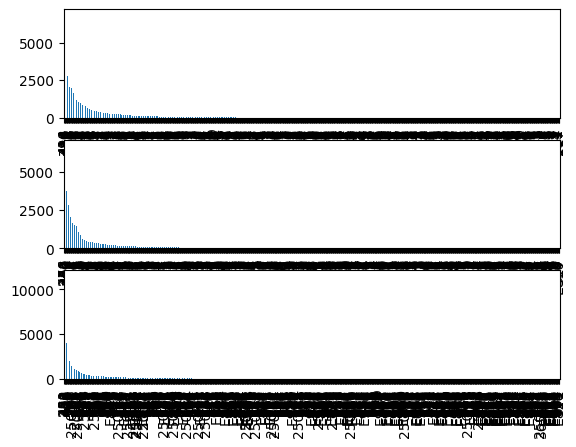

In [ ]:
import matplotlib.pyplot as plt
import pandas
fig, ax = plt.subplots(3,1)
df2['diag_1'].value_counts().plot(ax=ax[0], kind='bar')
df2['diag_2'].value_counts().plot(ax=ax[1], kind='bar')
df2['diag_3'].value_counts().plot(ax=ax[2], kind='bar')

<Axes: >

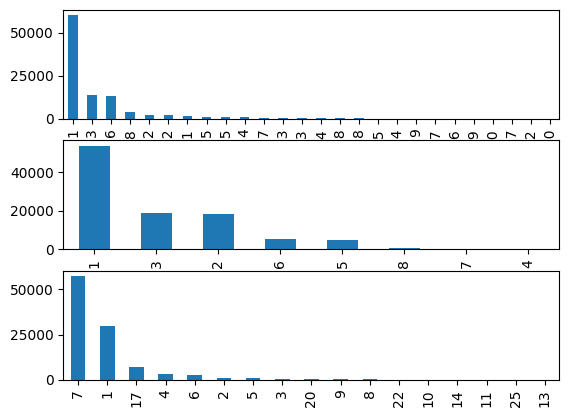

In [ ]:
fig, ax = plt.subplots(3,1)
df2['discharge_disposition_id'].value_counts().plot(ax=ax[0], kind='bar')
df2['admission_type_id'].value_counts().plot(ax=ax[1], kind='bar')
df2['admission_source_id'].value_counts().plot(ax=ax[2], kind='bar')

In [ ]:
df2.to_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/preprocessed_kevin', index = False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/preprocessed_kevin')

In [ ]:
df.head()

,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,discharge_disposition__17,discharge_disposition__18,discharge_disposition__19,discharge_disposition__20,discharge_disposition__22,discharge_disposition__23,discharge_disposition__24,discharge_disposition__25,discharge_disposition__27,discharge_disposition__28
0,0,5,6,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,15,1,3,59,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,1,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,35,1,2,44,1,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,45,1,1,51,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def freq_encoder(df,col):
  freq = (df.groupby(col).size()) / len(df2)
  df[col] = df[col].apply(lambda x : freq[x])

freq_encoder(df2,'diag_1')
freq_encoder(df2,'diag_2')
freq_encoder(df2,'diag_3')
"""freq_encoder(df2,'admission_type_id')
freq_encoder(df2,'discharge_disposition_id')
freq_encoder(df2,'admission_source_id')"""


"freq_encoder(df2,'admission_type_id')\nfreq_encoder(df2,'discharge_disposition_id')\nfreq_encoder(df2,'admission_source_id')"

In [ ]:
df2.info()

In [ ]:
df1.admission_type_id.value_counts()

In [ ]:
df2 = df2.drop(['A1Cresult','max_glu_serum'],axis=1)

In [ ]:
df2.loc[:,'num_medications':]

In [ ]:
df2.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
df2 = df2[df2.gender != 'Unknown/Invalid']


In [ ]:
df2.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [ ]:
df2.isna().sum()

In [ ]:
df3.admission_type_id.unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [ ]:
df3 = df3.drop(['weight'],axis=1)

In [ ]:
df3.info()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df3.diag_1.unique()

array([22,  2,  5,  7,  8, 12,  4, 16, 23, 19,  6, 21, 14,  9,  0, 17,  3,
       15, 10, 13,  1, 11, 20, 18])

In [ ]:
df3.diag_2.unique()

array([24,  1,  0,  7, 12,  6, 11,  5, 16, 13, 19,  2,  3, 20, 10, 15, 22,
        9,  8,  4, 23, 17, 14, 18, 21])

In [ ]:
df3.diag_3.unique()

array([18, 19,  7,  0, 20,  2, 11,  8, 12,  4,  6, 14,  1, 16, 13, 15,  9,
       10,  3, 17,  5])

In [ ]:
df3.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df3.isna().sum()

In [ ]:
df3.info()

In [ ]:
df3.describe()

In [ ]:
df3.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

##Model Building

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IntelliHealth/dataset_diabetes/preprocessed_kevin')


In [ ]:
y = ['metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
'examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone']
x = df.drop(y, axis = 1)
y = df[y]

In [ ]:
y.shape

(101763, 23)

In [ ]:
from keras.backend import dropout
import joblib
import tensorflow as tf

model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(74,)),
            tf.keras.layers.Normalization(),
            tf.keras.layers.Dense(units=128, activation='elu'),
            tf.keras.layers.Dense(units=256, activation='elu'),
            tf.keras.layers.Dense(units=512, activation='elu'),
            tf.keras.layers.Dense(units=256, activation='elu', kernel_regularizer='l2'),
            tf.keras.layers.Dropout(0.9),
            tf.keras.layers.Dense(units=128, activation='elu', kernel_regularizer='l2'),
            tf.keras.layers.Dense(units=23, activation='softmax'),
        ])
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['accuracy'])
model.fit(x, y, epochs=10, batch_size=128)
joblib.dump(model, 'model.pkl')

Epoch 1/10
796/796 [==============================] - 9s 10ms/step - loss: 0.2327 - accuracy: 0.3516
Epoch 2/10
796/796 [==============================] - 8s 11ms/step - loss: 0.0430 - accuracy: 0.3600
Epoch 3/10
796/796 [==============================] - 8s 10ms/step - loss: 0.0429 - accuracy: 0.3557
Epoch 4/10
796/796 [==============================] - 8s 10ms/step - loss: 0.0429 - accuracy: 0.3556
Epoch 5/10
796/796 [==============================] - 8s 11ms/step - loss: 0.0430 - accuracy: 0.3559
Epoch 6/10
796/796 [==============================] - 7s 9ms/step - loss: 0.0432 - accuracy: 0.3544
Epoch 7/10
796/796 [==============================] - 8s 11ms/step - loss: 0.0431 - accuracy: 0.3536
Epoch 8/10
796/796 [==============================] - 8s 10ms/step - loss: 0.0431 - accuracy: 0.3535
Epoch 9/10
796/796 [==============================] - 8s 10ms/step - loss: 0.0431 - accuracy: 0.3531
Epoch 10/10
796/796 [==============================] - 8s 10ms/step - loss: 0.0432 - accurac

['model.pkl']